In [ ]:
## Python basics for novice data scientists, supported by Wagatsuma Lab@Kyutech 
#
# The MIT License (MIT): Copyright (c) 2020 Hiroaki Wagatsuma and Wagatsuma Lab@Kyutech
# 
# Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
# The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE. */
#
# # @Time    : 2020-11-30 
# # @Author  : Hiroaki Wagatsuma
# # @Site    : https://github.com/hirowgit/2A1_python_intermediate_course
# # @IDE     : Python 3.9.14 (main, Sep  6 2022, 23:29:09) [Clang 13.1.6 (clang-1316.0.21.2.5)] on darwin
# # @File    : lec4_step7_BarStack_Aligned_Stage6.py 


In [292]:
import numpy as np
#prFill=[90    60    50    50    50    90    40    30    80    40  20 ]/100;
prFill=np.array([90, 60, 50, 50, 50, 90, 40, 30, 80, 40, 20])
prFill=prFill/100
fillLine=np.full(len(prFill),True)
LineT=[]
tmp=[]
k=0
for i in range(len(prFill)):
#for i in range(5):
#for i in range(5):
    if fillLine[i]:
        remF=1-prFill[i]
        IDrem=np.where((prFill[i+1:len(prFill)]<=remF) & fillLine[i+1:len(prFill)])
        tmp=i
        fID=i
        #j=0
        while IDrem[0].size > 0:
            fID=IDrem[0][0]+fID+1
            tmp=np.append(tmp,fID)
            remF=remF-prFill[fID]
            IDrem=np.where((prFill[fID+1:len(prFill)]<=remF) & fillLine[fID+1:len(prFill)])
        LineT.append(tmp)
        fillLine[tmp]=False
        print("k;",k)
        print("LineT;",LineT)
        k=k+1
        print("k;",k)

k; 0
LineT; [0]
k; 1
k; 1
LineT; [0, array([1, 6], dtype=int64)]
k; 2
k; 2
LineT; [0, array([1, 6], dtype=int64), array([2, 3], dtype=int64)]
k; 3
k; 3
LineT; [0, array([1, 6], dtype=int64), array([2, 3], dtype=int64), array([ 4,  7, 10], dtype=int64)]
k; 4
k; 4
LineT; [0, array([1, 6], dtype=int64), array([2, 3], dtype=int64), array([ 4,  7, 10], dtype=int64), 5]
k; 5
k; 5
LineT; [0, array([1, 6], dtype=int64), array([2, 3], dtype=int64), array([ 4,  7, 10], dtype=int64), 5, 8]
k; 6
k; 6
LineT; [0, array([1, 6], dtype=int64), array([2, 3], dtype=int64), array([ 4,  7, 10], dtype=int64), 5, 8, 9]
k; 7


In [293]:
#行列の要素内の型が違うことが問題となる
for i in LineT:
    print(type(i))

<class 'int'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'int'>
<class 'int'>
<class 'int'>


In [294]:
#型がintのものを'numpy.ndarray'に変換
f_LineT = [np.array(i) if type(i)==int else i for i in LineT]
print(f_LineT)
[print(type(i)) for i in f_LineT]

[array(0), array([1, 6], dtype=int64), array([2, 3], dtype=int64), array([ 4,  7, 10], dtype=int64), array(5), array(8), array(9)]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


[None, None, None, None, None, None, None]

In [295]:
LineT

[0,
 array([1, 6], dtype=int64),
 array([2, 3], dtype=int64),
 array([ 4,  7, 10], dtype=int64),
 5,
 8,
 9]

In [296]:
#lenLineT=cell2mat(cellfun(@(x) length(x),LineT,'UniformOutput',false));に該当部
lenLineT = [i.size for i in f_LineT]
print(lenLineT)

[1, 2, 2, 3, 1, 1, 1]


In [297]:
#stackBarD=zeros(size(LineT,2),max(lenLineT));に該当部
stackBarD = np.zeros((np.shape(f_LineT)[0],max(lenLineT)))

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


C:\Users\Kaito\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [298]:
len(f_LineT)

7

In [299]:
f_LineT[1]
print(prFill)
i = [1, 6]
print(prFill[i])

[0.9 0.6 0.5 0.5 0.5 0.9 0.4 0.3 0.8 0.4 0.2]
[0.6 0.4]


In [300]:
#stackBarDにグラフに積み上げるprFillの値を置き換え
for i in range(len(f_LineT)):
    tmp = f_LineT[i]
    stackBarD[i,0:lenLineT[i]] = prFill[tmp]
print(stackBarD)

1
[0.]
[[0.9 0.  0. ]
 [0.  0.  0. ]
 [0.  0.  0. ]
 [0.  0.  0. ]
 [0.  0.  0. ]
 [0.  0.  0. ]
 [0.  0.  0. ]]
2
[0. 0.]
[[0.9 0.  0. ]
 [0.6 0.4 0. ]
 [0.  0.  0. ]
 [0.  0.  0. ]
 [0.  0.  0. ]
 [0.  0.  0. ]
 [0.  0.  0. ]]
2
[0. 0.]
[[0.9 0.  0. ]
 [0.6 0.4 0. ]
 [0.5 0.5 0. ]
 [0.  0.  0. ]
 [0.  0.  0. ]
 [0.  0.  0. ]
 [0.  0.  0. ]]
3
[0. 0. 0.]
[[0.9 0.  0. ]
 [0.6 0.4 0. ]
 [0.5 0.5 0. ]
 [0.5 0.3 0.2]
 [0.  0.  0. ]
 [0.  0.  0. ]
 [0.  0.  0. ]]
1
[0.]
[[0.9 0.  0. ]
 [0.6 0.4 0. ]
 [0.5 0.5 0. ]
 [0.5 0.3 0.2]
 [0.9 0.  0. ]
 [0.  0.  0. ]
 [0.  0.  0. ]]
1
[0.]
[[0.9 0.  0. ]
 [0.6 0.4 0. ]
 [0.5 0.5 0. ]
 [0.5 0.3 0.2]
 [0.9 0.  0. ]
 [0.8 0.  0. ]
 [0.  0.  0. ]]
1
[0.]
[[0.9 0.  0. ]
 [0.6 0.4 0. ]
 [0.5 0.5 0. ]
 [0.5 0.3 0.2]
 [0.9 0.  0. ]
 [0.8 0.  0. ]
 [0.4 0.  0. ]]


In [301]:
y_data_stack = []
y_data_stack = tuple([np.append(y_data_stack, i)  for i in stackBarD])
print(y_data_stack)

(array([0.9, 0. , 0. ]), array([0.6, 0.4, 0. ]), array([0.5, 0.5, 0. ]), array([0.5, 0.3, 0.2]), array([0.9, 0. , 0. ]), array([0.8, 0. , 0. ]), array([0.4, 0. , 0. ]))


In [302]:
LineT[0]

0

In [331]:
x_label = [i+1 for i in range(len(prFill))]
x_stack_label = [i+1 for i in range(len(stackBarD))]
y_label = np.arange(0, 12, 2)
y_label =[i/10 for i in y_label]
print(x_label)
print(x_stack_label)
print(y_label)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[1, 2, 3, 4, 5, 6, 7]
[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]


In [332]:
#matplotlibモジュールの読み込み
import matplotlib.pyplot as plt

[0.9 0.6 0.5 0.5 0.9 0.8 0.4]
[0.9 1.  1.  0.8 0.9 0.8 0.4]
[0.9 1.  1.  1.  0.9 0.8 0.4]
key1; 0
tmp1; 0.9
key; 1
tmp; 0.6
key; 6
tmp; 0.4
key; 2
tmp; 0.5
key; 3
tmp; 0.5
key; 4
tmp; 0.5
key; 7
tmp; 0.3
key; 10
tmp; 0.2
key1; 5
tmp1; 0.9
key1; 8
tmp1; 0.8
key1; 9
tmp1; 0.4


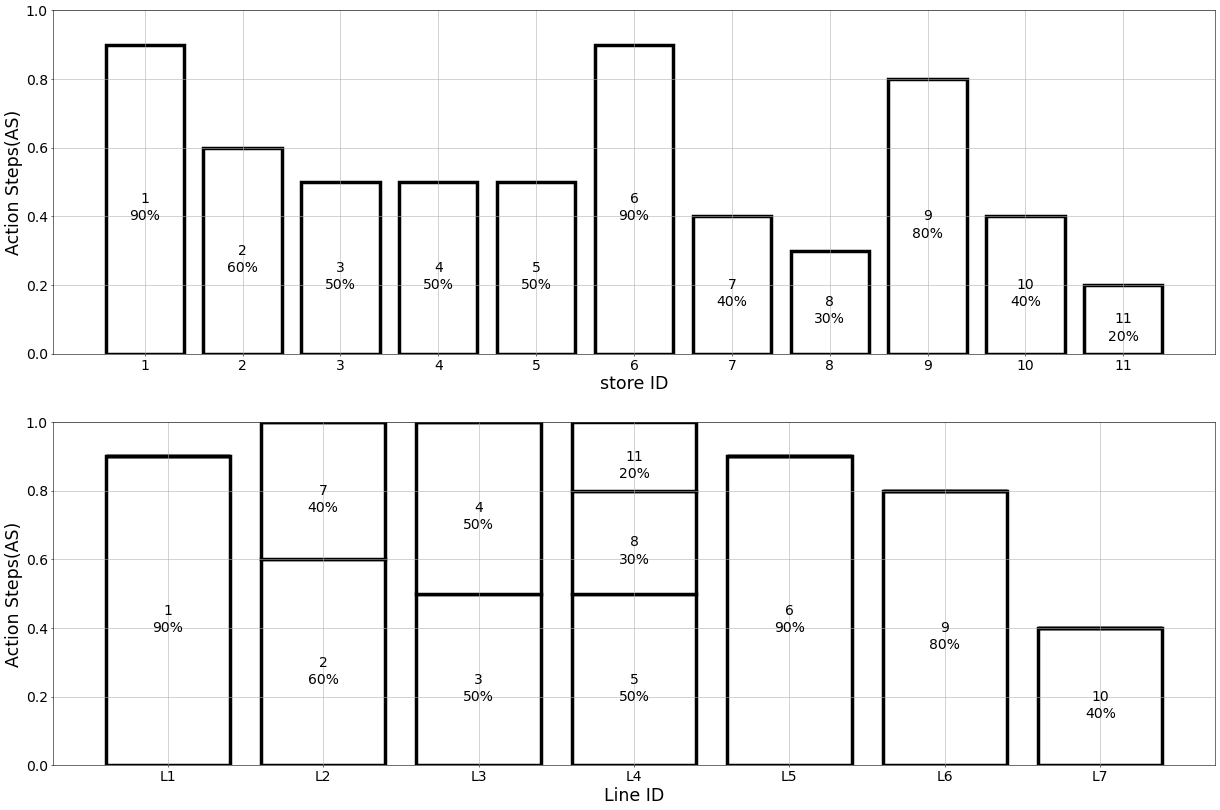

In [336]:
#2つのグラフの表示画面の分割
fig = plt.figure(figsize=(30,20), dpi=50)
init_fig = fig.add_subplot(2 , 1, 1)
stack_fig = fig.add_subplot(2, 1, 2)

#上のグラフの表示設定
#参考；https://www.yutaka-note.com/entry/matplotlib_axis

init_fig.set_xlabel("store ID", size = 25)
init_fig.set_xticks(x_label)
init_fig.set_xticklabels(x_label, size=20)

init_fig.set_ylabel("Action Steps(AS)", size = 25)
init_fig.set_yticks(y_label)
init_fig.set_yticklabels(y_label, size=20)
init_fig.set_ylim(0 , 1)
# init_fig.set_yticks(np.arange(0, 1, 0.2))
# init_fig.title("")
init_fig.grid(True)
#上のグラフの表示
bar = init_fig.bar(x_label, prFill, color = 'w', edgecolor ='black', linewidth = '5')
# init_fig.text(cx, cy, df.columns[i], color="k", ha="center", va="center")

#上のグラフのBAR内の番号記入

for i in range(len(bar)):
        cx = bar[i].get_x() + bar[i].get_width() / 2
#         print(cx)
        cy = bar[i].get_y() + bar[i].get_height() / 2
#         print(cy)
        init_fig.text(cx, cy, x_label[i], size= 20,  color="k", ha="center", va="center")
        init_fig.text(cx, cy-0.05, str(f'{prFill[i]*100:.0f}') +'%',size= 20,  color="k", ha="center", va="center")
        
#下のグラフの表示設定
#参考；https://www.yutaka-note.com/entry/matplotlib_axis

stack_fig.set_xlabel("Line ID", size = 25)
stack_fig.set_xticks(x_stack_label)
stack_fig.set_xticklabels(list(map(lambda label:'L' + str(label), x_stack_label)), size=20)

stack_fig.set_ylabel("Action Steps(AS)", size = 25)
stack_fig.set_yticks(y_label)
stack_fig.set_yticklabels(y_label, size=20)
stack_fig.set_ylim(0 , 1)
# init_fig.set_yticks(np.arange(0, 1, 0.2))
# init_fig.title("")
stack_fig.grid(True)
#下のグラフの表示
bottom = np.zeros(stackBarD.T.shape[1])

for i in range(stackBarD.T.shape[0]):
    
    if i ==0:
        s_bar = stack_fig.bar(x_stack_label, stackBarD.T[i], color = 'w', edgecolor ='black', linewidth = '5')
    else:
        s_bar = stack_fig.bar(x_stack_label, stackBarD.T[i], bottom= bottom, color = 'w', edgecolor ='black', linewidth = '5')
        
    
    bottom = np.add(bottom, stackBarD.T[i])
    print(bottom)
# stack_fig.bar(x_stack_label, stackBarD.T[0], color = 'w', edgecolor ='black', linewidth = '5')
# stack_fig.bar(x_stack_label, stackBarD.T[1], bottom= stackBarD.T[0], color = 'w', edgecolor ='black', linewidth = '5')
# stack_fig.bar(x_stack_label, stackBarD.T[2], bottom= stackBarD.T[0] + stackBarD.T[1], color = 'w', edgecolor ='black', linewidth = '5')
n_LineT = list(map(lambda Line:Line +1, f_LineT))

for i in range(stackBarD.shape[0]):
    baseY=0
    for j in range(stackBarD.shape[1]):
        if stackBarD[i][j]>0:
#             print('ffff',f_LineT[i].size)
            if f_LineT[i].size ==1:
                key = f_LineT[i]
                print('key1;',key)
                tmp = prFill[key]
                print('tmp1;',tmp)
            else:
                key = f_LineT[i][j]
                print('key;',key)
                tmp = prFill[key]
                print('tmp;',tmp)
            ypos = tmp/2
            stack_fig.text(s_bar[i].get_x() + s_bar[i].get_width() / 2, baseY+ ypos, str(key+1),size= 20,  color="k", ha="center", va="center")
            stack_fig.text(s_bar[i].get_x() + s_bar[i].get_width() / 2, baseY+ ypos - 0.05, str(f'{tmp*100:.0f}') +'%',size= 20,  color="k", ha="center", va="center")
            baseY = baseY+tmp
#     cx = s_bar[j].get_x() + s_bar[j].get_width() / 2
#     print(cx)
#     cy = s_bar[j].get_y() + s_bar[j].get_height() / 2
#     print(cy)
#     stack_fig.text(cx, cy,stackBarD.T[0][j], size= 20,  color="k", ha="center", va="center")
# stack_fig
#       init_fig.text(cx, cy-0.05, str(f'{prFill[i]*100:.0f}') +'%',size= 20,  color="k", ha="center", va="center")

In [317]:
print(stackBarD)
print(f_LineT)
print(n_LineT)
print(prFill)
f_LineT[0].size

[[0.9 0.  0. ]
 [0.6 0.4 0. ]
 [0.5 0.5 0. ]
 [0.5 0.3 0.2]
 [0.9 0.  0. ]
 [0.8 0.  0. ]
 [0.4 0.  0. ]]
[array(0), array([1, 6], dtype=int64), array([2, 3], dtype=int64), array([ 4,  7, 10], dtype=int64), array(5), array(8), array(9)]
[1, array([2, 7], dtype=int64), array([3, 4], dtype=int64), array([ 5,  8, 11], dtype=int64), 6, 9, 10]
[0.9 0.6 0.5 0.5 0.5 0.9 0.4 0.3 0.8 0.4 0.2]


1

In [268]:
print(LineT)
print(type(LineT))
n_LineT = list(map(lambda Line:Line +1, LineT))
print(l)
print(type(l))

[0, array([1, 6], dtype=int64), array([2, 3], dtype=int64), array([ 4,  7, 10], dtype=int64), 5, 8, 9]
<class 'list'>
[1, array([2, 7], dtype=int64), array([3, 4], dtype=int64), array([ 5,  8, 11], dtype=int64), 6, 9, 10]
<class 'list'>


In [269]:
print(LineT)
print(stackBarD.T)

[0, array([1, 6], dtype=int64), array([2, 3], dtype=int64), array([ 4,  7, 10], dtype=int64), 5, 8, 9]
[[0.9 0.6 0.5 0.5 0.9 0.8 0.4]
 [0.  0.4 0.5 0.3 0.  0.  0. ]
 [0.  0.  0.  0.2 0.  0.  0. ]]


In [270]:
#下のグラフの表示設定
#参考；https://www.yutaka-note.com/entry/matplotlib_axis

stack_fig.set_xlabel("store ID", size = 25)
stack_fig.set_xticks(x_stack_label)
stack_fig.set_xticklabels(x_stack_label, size=20)

stack_fig.set_ylabel("Action Steps(AS)", size = 25)
stack_fig.set_yticks(y_label)
stack_fig.set_yticklabels(y_label, size=20)
stack_fig.set_ylim(0 , 1)
# init_fig.set_yticks(np.arange(0, 1, 0.2))
# init_fig.title("")
stack_fig.grid(True)
#上のグラフの表示
stack_fig.bar(x_stack_label, stackBarD.T[0], color = 'w', edgecolor ='black', linewidth = '5')

<BarContainer object of 7 artists>

In [26]:
init_fig.bar(x_label, prFill)
# plt.show

<BarContainer object of 11 artists>

In [ ]:
len(LineT[1])

In [ ]:
LineT[2].size

In [140]:
np.zeros(stackBarD.T.shape[1])

array([0., 0., 0., 0., 0., 0., 0.])